# 軌道要素とは
#### **〜Cartesian - Keplerian 相互変換の実装を目指して〜**

---
## 目次
- [軌道要素とは](#軌道要素とは)
  - [目次](#目次)
  - [軌道の基本](#軌道の基本)
  - [状況設定: 制限2体問題](#状況設定-制限2体問題)
  - [Cartesian軌道要素](#cartesian軌道要素)
  - [Keplerian軌道要素](#keplerian軌道要素)
  - [Keplerian to Cartesian への変換](#keplerian-to-cartesian-への変換)
  - [まとめ](#まとめ)
  - [演習問題](#演習問題)
---

# 軌道の基本


## 1. 楕円の幾何学

### 1.1 楕円の方程式

直交座標系における楕円の方程式は、中心が点 $(h, k)$ で、水平方向の半径が $a$、垂直方向の半径が$b$の場合、次のように表される．

$$
\frac{(x-h)^2}{a^2} + \frac{(y-k)^2}{b^2} = 1
$$

もし楕円が原点$(0, 0)$を中心にしている場合は、方程式は以下のように簡略化される．

$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$

楕円のグラフを以下に示し，以下の幾何的な概念を確認する
- 長半径(Semi-Major Axis)
- 短半径(Semi-Minor Axis)
- 焦点距離(Focal distance)

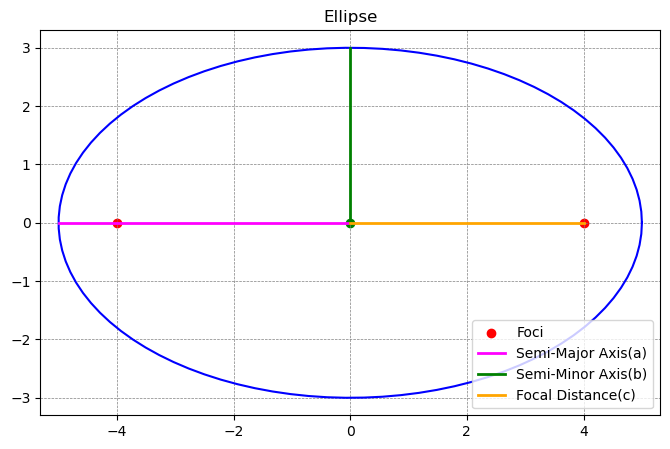

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# 楕円のパラメータ設定
h = 0  # X軸の中心
k = 0  # Y軸の中心
a = 5  # 長軸の半径
b = 3  # 短軸の半径

# 焦点の計算
c = np.sqrt(a**2 - b**2)

# 角度の配列を生成
nu = np.linspace(0, 2 * np.pi, 100)

# 楕円の方程式に基づくX軸とY軸の座標を計算
x = h + a * np.cos(nu)
y = k + b * np.sin(nu)

# グラフを描画
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue')
plt.scatter([h + c, h - c], [k, k], color='red', label='Foci')  # 焦点をプロット
plt.scatter([h], [k], color='green')  # 中心点をプロット

# 長半径2aを示す線を描画
plt.plot([h - a, h], [k, k], color='magenta', linewidth=2, label='Semi-Major Axis(a)')
# 短半径2bを示す線を描画
plt.plot([h, h], [k, k + b], color='green', linewidth=2, label='Semi-Minor Axis(b)')
# 焦点距離cを示す線を描画
plt.plot([h, h + c], [k, k], color='orange', linewidth=2, label='Focal Distance(c)')

plt.title('Ellipse')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')  # 凡例を右下に移動
plt.axis('equal')  # 同じスケールで軸を保持
plt.show()


#### 離心率(eccentricity)

離心率$e$とは円錐曲線の形状を表すパラメータであり，次のような関係がある，

$$
e  = \frac{c}{a}
$$

$0 < e < 1$のとき円錐曲線は楕円(Ellipse)となる．このノートでは，楕円以外の円錐曲線．放物線や双曲線についてはあまり触れない．


### 1.2 極座標系における楕円の方程式

極座標系における楕円の方程式は，以下のように表される．

$$
r(\nu) = \frac{a(1-e^2)}{1 + e\cos(\nu)}
$$
where
$$
\begin{align*}
    a &= \text{長半径(Semi-major axis)} \\
    e &= \text{離心率(eccentricity)}
\end{align*}
$$

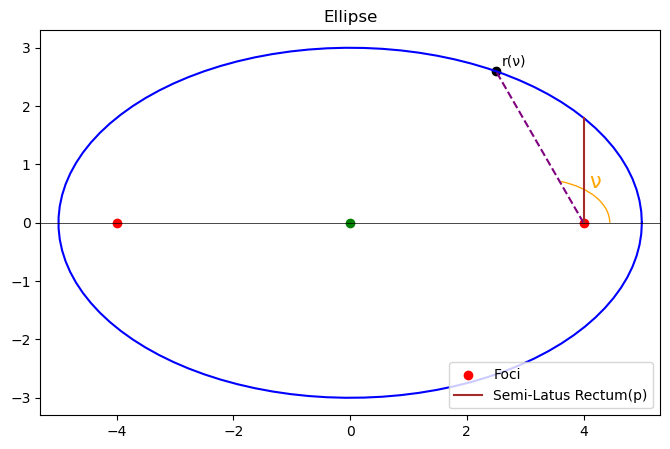

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 楕円のパラメータ設定
h = 0  # X軸の中心
k = 0  # Y軸の中心
a = 5  # 長軸の半径
b = 3  # 短軸の半径

# 焦点の計算
c = np.sqrt(a**2 - b**2)

# 離心率の計算
e = c / a

# 角度の配列を生成
nu = np.linspace(0, 2 * np.pi, 100)

# 楕円の方程式に基づくX軸とY軸の座標を計算
x = h + a * np.cos(nu)
y = k + b * np.sin(nu)

# グラフを描画
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue')
plt.scatter([h + c, h - c], [k, k], color='red', label='Foci')  # 焦点をプロット
plt.scatter([h], [k], color='green')  # 中心点をプロット

# 真近点離角の設定
true_anomaly = np.deg2rad(60)  # 45度をラジアンに変換

# 衛星の位置の計算
satellite_x = h + a * np.cos(true_anomaly)
satellite_y = k + b * np.sin(true_anomaly)

# 焦点から衛星までの直線を描画
plt.plot([h + c, satellite_x], [k, satellite_y], color='purple', linestyle='--')

# 真近点離角を描画
arc = patches.Arc((c-0.8, k), a/2, b/2, theta1=0, theta2=np.rad2deg(true_anomaly), color='orange', linestyle='-')
plt.gca().add_patch(arc)
plt.text(c+0.1, k+0.6, 'ν', color='orange', size=15)
# # 衛星の位置をプロット
plt.scatter([satellite_x], [satellite_y], color='black')
plt.text(satellite_x+0.1, satellite_y+0.1, 'r(ν)', color='black')

# 楕円の方程式におけるsemi-latus rectumの計算
p = a * (1 - e**2)

# 焦点を通るsemi-latus rectumを描画
plt.plot([c, c], [k, k+p], color='brown', linestyle='-', label='Semi-Latus Rectum(p)')

plt.title('Ellipse')
plt.axhline(0, color='black', linewidth=0.5)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')  # 凡例を右下に移動
plt.axis('equal')  # 同じスケールで軸を保持
plt.show()


ここで，**半直弦(Semi-latus rectum)** とは，$\nu = \frac{\pi}{2}のときの|r|$であり，

**楕円の場合**，すなわち $0 < e < 1$の場合，
$$
p = a(1-e^2)
$$
となる．

半直弦$p$を用いると，楕円の方程式の極座標における表現は以下のように書き換えることができる．

$$
r(\nu) = \frac{p}{1 + e\cos(\nu)}
$$

#### 練習問題
長半径$a$と離心率$e$を用いて，

$$
\begin{align*}
    \text{近点距離 } r_{periapsis} \\
    \text{遠点距離 } r_{apoapsis}
\end{align*}
$$

をそれぞれ表せ．
なお，近点とは$\nu=0$のとき．遠点とは$\nu=\pi$のとき．

## 2. 軌道のエネルギー積分

---

# 状況設定：制限2体問題(restricted two-body problem)

## 1. "2体問題(two-body problem)"とは

２物体$P_1$, $P_2$が互いの万有引力の影響のみを受けるときの$P_1$,$P_2$の相対運動を扱う．

## 2. 衛星の運動方程式

### 2.1 角運動量ベクトル(angular momentum vector)

### 2.2 離心率ベクトル(eccentricity vector)またはラプラスベクトル(Laplace vector)

### 3. 2体問題の運動方程式の解析解

---

# Cartesian軌道要素

## 1. 位置・速度ベクトル

---

# Keplerian軌道要素

## 慣性座標系の導入

## 1. 軌道長半径(Semi-Major Axis): $a$

- 定義

- image: 円軌道(Circular Orbit) -> $a$を広げる

- 実装

- 実装: ユニットテスト

## 2.離心率(Eccentricity): $e$

- 定義

- image: $e$の値を動かす

- 実装

- 実装: ユニットテスト

## 3. 軌道傾斜角(Inclination): $i$

- 定義

- image: $i$の値を動かす

- 実装

- 実装: ユニットテスト

## 4. 昇交点赤経(Right Ascension of Ascending Node): $\Omega$

- 定義

- image: $\Omega$の値を動かす

- 実装

- 実装: ユニットテスト

## 5. 近点引数(Argument of Periapsis): $\omega$

- 定義

- image: $\omega$の値を動かす

- 実装

- 実装: ユニットテスト

## 6. 真近点離角(True Anomaly): $\nu$

- 定義

- image: $\nu$の値を動かす

### Keplerian軌道要素まとめ

TODO: 軌道の形状，向き，衛星の位置など，テーブルに

---

# Keplerian to Cartesian への変換

- **概要**：ステップバイステップによる変換の流れ


## 1. Peri-focal座標系の導入

## 2. $\nu$を用いた衛星運動方程式

## 3. Peri-focal座標系における位置・速度ベクトルの表現

## 4. $\omega$による回転

## 5. $i$による回転

## 6. $\Omega$による回転

---

# 演習問題

### 相互変換機能を備えた軌道要素クラスを設計し，実装せよ．

#### 要求仕様
- 軌道要素をメンバ変数としてもつこと
- Cartesian -> Keplerian 変換を行うメソッドを実装すること
- Keplerian -> Cartesian 変換を行うメソッドを実装すること

いくつのクラスで実現するかは自由とする

#### 試験データ

| Cartesian | 

---